<a href="https://colab.research.google.com/github/SABRIS13/F1_Analisis/blob/main/Analisis_Formula_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# F1: 2010-2022


### Introducción

La Fórmula 1 (F1), es la competición automovilistica internacional más popular y prestigiosa del mundo. Es dirigida por la Federación Internacional del Automóvil (FIA), quien la fundó en 1950 con la participación de escuderías como: Ferrari, Alfa Romeo y Maserati. 

Cada temporada de F1 consiste en una serie carreras denominadas Gran Premio (Grand Prix), las cuales se llevan a cabo en autódromos y algunos circuitos urbanos. Cada corredor utiliza un monoplaza de la última tecnológia disponible, limitadas por un reglamento disponible.

Cada competición dura tres días, en el primero se realizan las sesiones de entrenamientos, el segundo la clasificación y finalmente en el tercero se celebra la carrera. Desde el 2006, se instaló el sistema de clasificación de tres sesiones denominadas: Q1, Q2 y Q3, que se mantienen en la actualidad con algunas modificaciones. Con este sistema clasificatorio se determina el orden de salida el día de la carrera desde el más lento al más rápido, como se estableció a partir de 2010.

#### Requerimientos & asumpsiones

1. Se tomarán las temporadas de carrera desde 2010 a 2022,+con el proposito de minimizar las diferencias entre temporadas y carreras.
2. Se clasificarán los circuitos por nivel de dificultad para poder realizar un modelo predictivo

#### Riesgos y Contingencias 

Existe un conjunto de diferencias entre cada temporada respecto a:
- Cambios de pilotos entre escuderías
- Llegada de nuevos pilotos
- Distintos circuitos en el calendario
- Cambios en las piezas de los vehículos

#### Terminología

- GrandPrix: Gran Premio
- Constructores: Escuderías (equipos)

#### Objetivo principal

Estimar con un accuracy de 80% el resultado de una carrera "Grand Prix" usando un modelos de red neuronal.

#### Resultados deseados del proyecto

- Analisis de datos de los corredoreS y equipos.
- Clustering de los circuitos de acuerdo a su nivel de dificultad.
- Modelo predictivo de los resultados del Grand Prix en base a los datos disponibles de los corredores.


### Analisis de los Datos

Librerías

In [1]:
# Numpy y pandas para manipulación de la data
import numpy as np
import pandas as pd

# Matplotlib y seaborn para el ánalisis de datos
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Librerías extras:
import datetime


Datasets

In [3]:
#Carga de los datasets
circuits=pd.read_csv("circuits.csv")
constructor_results=pd.read_csv("constructor_results.csv")
constructor_standings=pd.read_csv("constructor_standings.csv")
constructors=pd.read_csv("constructors.csv")
driver_standings=pd.read_csv("driver_standings.csv")
drivers=pd.read_csv("drivers.csv")
lap_times=pd.read_csv("lap_times.csv")
pit_stops=pd.read_csv("pit_stops.csv")
qualifying=pd.read_csv("qualifying.csv")
races=pd.read_csv("races.csv")
results=pd.read_csv("results.csv")
sprint_results=pd.read_csv("sprint_results.csv")
status=pd.read_csv("status.csv")

Relacion entre datasets

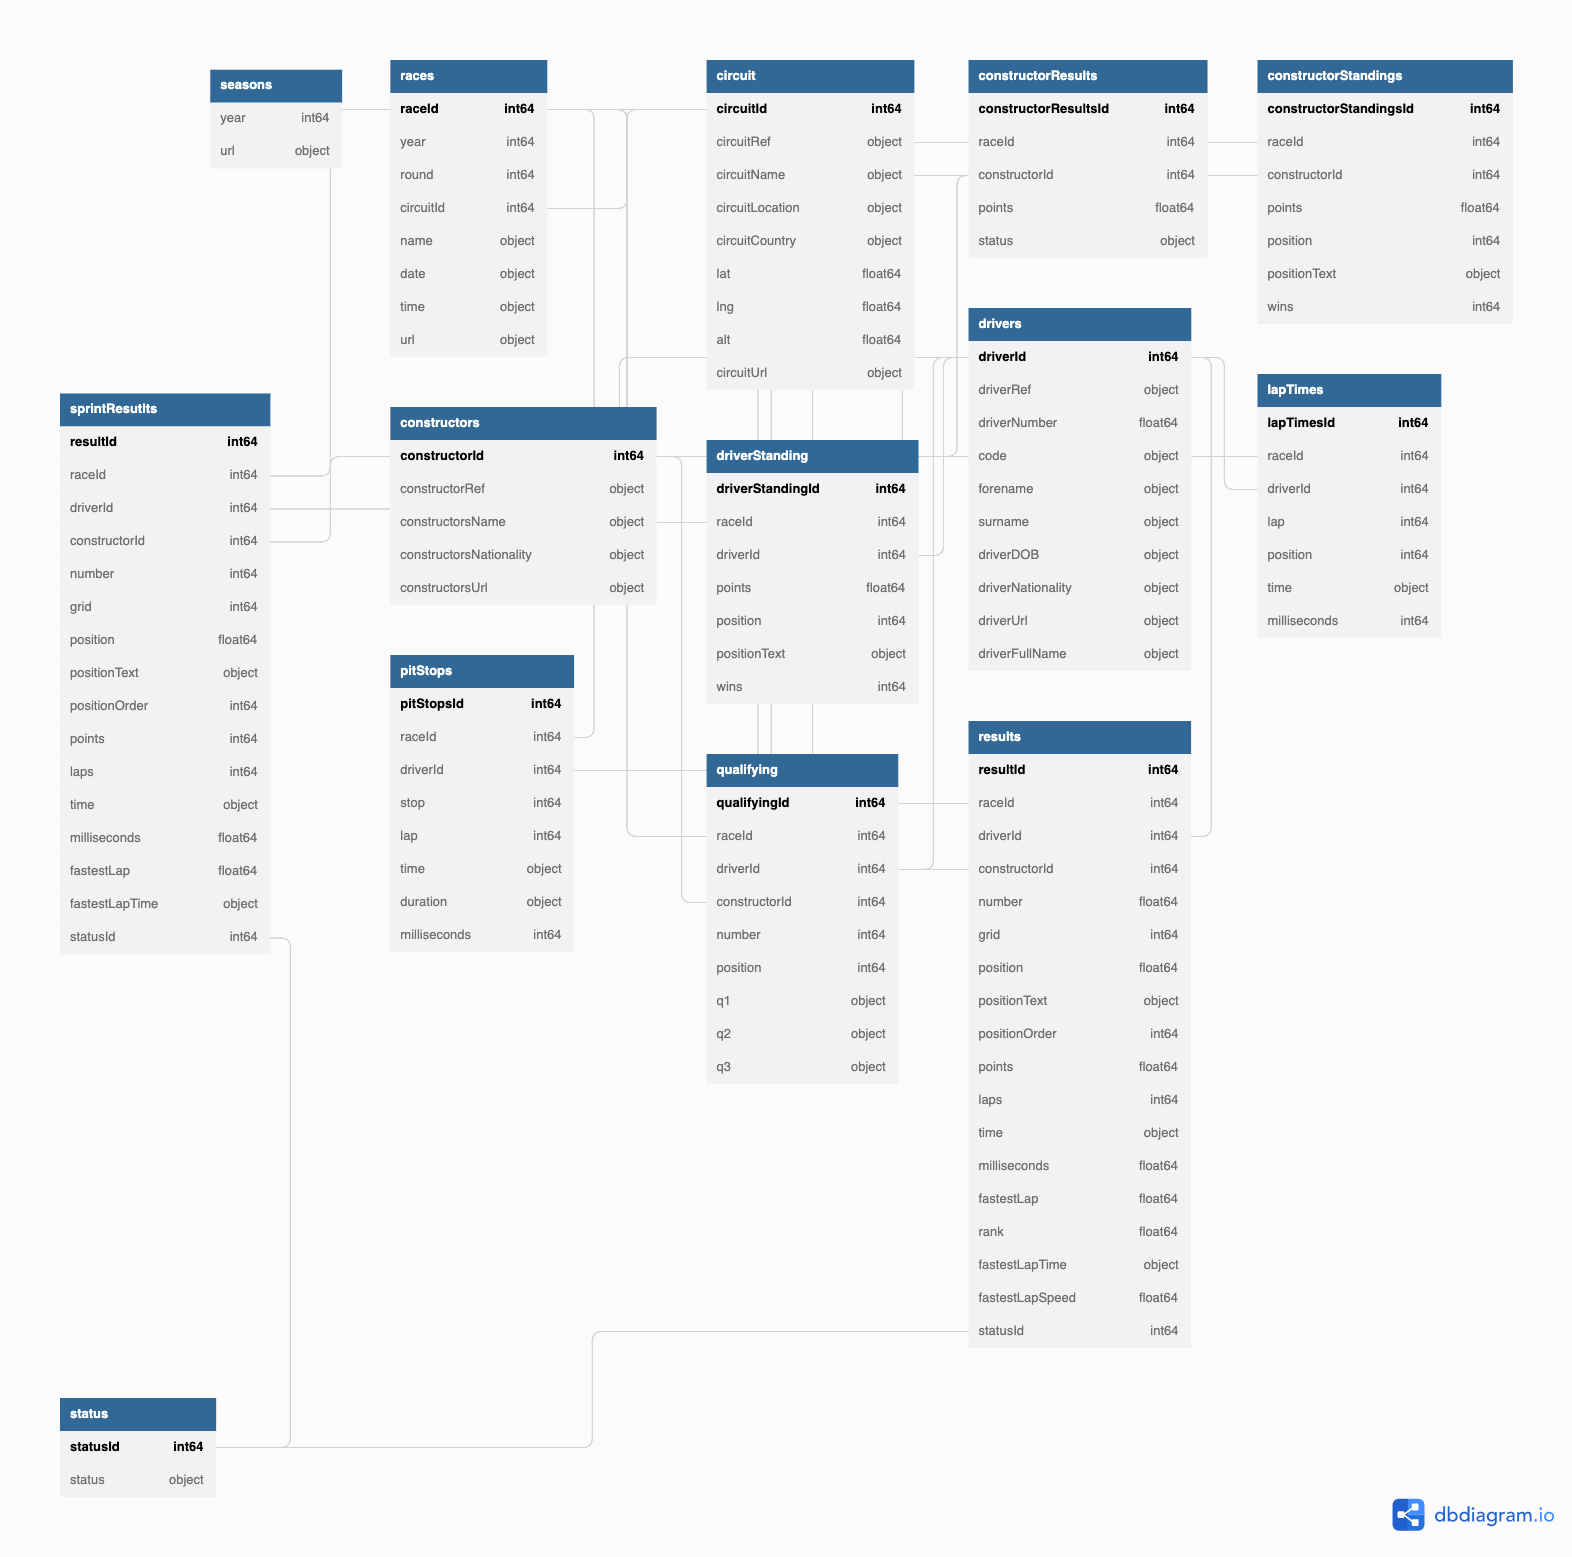

### **Carreras**

Obtener el identificador único de las carreras durante el periodo de analisis

In [15]:
#Analisamos la data correspondiente a las carreras (races), con el proposito de poder filtrar las carreras correspondientes a los años 
#2010 a 2022
races.head(3)

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [10]:
races.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1102 entries, 0 to 1101
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   raceId       1102 non-null   int64 
 1   year         1102 non-null   int64 
 2   round        1102 non-null   int64 
 3   circuitId    1102 non-null   int64 
 4   name         1102 non-null   object
 5   date         1102 non-null   object
 6   time         1102 non-null   object
 7   url          1102 non-null   object
 8   fp1_date     1102 non-null   object
 9   fp1_time     1102 non-null   object
 10  fp2_date     1102 non-null   object
 11  fp2_time     1102 non-null   object
 12  fp3_date     1102 non-null   object
 13  fp3_time     1102 non-null   object
 14  quali_date   1102 non-null   object
 15  quali_time   1102 non-null   object
 16  sprint_date  1102 non-null   object
 17  sprint_time  1102 non-null   object
dtypes: int64(4), object(14)
memory usage: 155.1+ KB


In [31]:
races_2010_2022=races.query('year >= 2010 and year<=2022')
races_2010_2022.head(3)

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
336,337,2010,1,3,Bahrain Grand Prix,2010-03-14,12:00:00,http://en.wikipedia.org/wiki/2010_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
337,338,2010,2,1,Australian Grand Prix,2010-03-28,06:00:00,http://en.wikipedia.org/wiki/2010_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
338,339,2010,3,2,Malaysian Grand Prix,2010-04-04,08:00:00,http://en.wikipedia.org/wiki/2010_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [33]:
#Información acerca del número de carreras entre los años 2010 a 2022
races_2010_2022.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 259 entries, 336 to 1078
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   raceId       259 non-null    int64 
 1   year         259 non-null    int64 
 2   round        259 non-null    int64 
 3   circuitId    259 non-null    int64 
 4   name         259 non-null    object
 5   date         259 non-null    object
 6   time         259 non-null    object
 7   url          259 non-null    object
 8   fp1_date     259 non-null    object
 9   fp1_time     259 non-null    object
 10  fp2_date     259 non-null    object
 11  fp2_time     259 non-null    object
 12  fp3_date     259 non-null    object
 13  fp3_time     259 non-null    object
 14  quali_date   259 non-null    object
 15  quali_time   259 non-null    object
 16  sprint_date  259 non-null    object
 17  sprint_time  259 non-null    object
dtypes: int64(4), object(14)
memory usage: 38.4+ KB


Nos intersa conocer el raceid de las carreras realizadas entre los años 2010- 2022 así como el circuito Id, por esta razón solo conservaremos dichas columnas. Las demás contienen valores "\N", que son nulos.

In [39]:
races_2010_2022=races_2010_2022[["raceId","year","circuitId"]]
races_2010_2022

,raceId,year,circuitId
336,337,2010,3
337,338,2010,1
338,339,2010,2
339,340,2010,17
340,341,2010,4
...,...,...,...
1074,1092,2022,22
1075,1093,2022,69
1076,1094,2022,32
1077,1095,2022,18


In [38]:
races_2010_2022[races_2010_2022["year"]==2010]

,raceId,year,round,circuitId
336,337,2010,1,3
337,338,2010,2,1
338,339,2010,3,2
339,340,2010,4,17
340,341,2010,5,4
341,342,2010,6,6
342,343,2010,7,5
343,344,2010,8,7
344,345,2010,9,12
345,346,2010,10,9


In [63]:
carreras=races_2010_2022["raceId"].unique()

In [115]:
def filtar_2010_2022(dataset):
  name=f"{dataset}_2010_2022"
  name=dataset[dataset.raceId.isin(carreras)].sort_values("raceId")
  return name
  

**Circuitos**

Filtrar los circuitos que se utilizaron durante el periodo de tiempo determinado

In [116]:
circuitos=races_2010_2022["circuitId"].unique()
circuitos

array([ 3,  1,  2, 17,  4,  6,  5,  7, 12,  9, 10, 11, 13, 14, 15, 22, 35,
       18, 24, 20, 68, 69, 70, 71, 32, 73, 34, 76, 75, 21, 78, 39, 77, 79])

In [119]:
circuits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   circuitId   77 non-null     int64  
 1   circuitRef  77 non-null     object 
 2   name        77 non-null     object 
 3   location    77 non-null     object 
 4   country     77 non-null     object 
 5   lat         77 non-null     float64
 6   lng         77 non-null     float64
 7   alt         77 non-null     object 
 8   url         77 non-null     object 
dtypes: float64(2), int64(1), object(6)
memory usage: 5.5+ KB


In [120]:
circuits.head(3)

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.9680,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.7380,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.5106,7,http://en.wikipedia.org/wiki/Bahrain_Internati...


In [121]:
circuits_2010_2022=circuits[circuits.circuitId.isin(circuitos)]
circuits_2010_2022.drop(["url"],axis=1)

,circuitId,circuitRef,name,location,country,lat,lng,alt
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.968000,10
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.738000,18
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.510600,7
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.261110,109
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.405000,130
5,6,monaco,Circuit de Monaco,Monte-Carlo,Monaco,43.73470,7.420560,7
6,7,villeneuve,Circuit Gilles Villeneuve,Montreal,Canada,45.50000,-73.522800,13
8,9,silverstone,Silverstone Circuit,Silverstone,UK,52.07860,-1.016940,153
9,10,hockenheimring,Hockenheimring,Hockenheim,Germany,49.32780,8.565830,103
10,11,hungaroring,Hungaroring,Budapest,Hungary,47.57890,19.248600,264


### **Drivers Standings: Pilotos**

Obtener los id de los pilotos participantes en base a su posición en las carreras.

In [124]:
drivers_standings_2010_2022=filtar_2010_2022(driver_standings)

In [125]:
driver_standings.head(22)

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0
5,6,18,6,3.0,6,6,0
6,7,18,7,2.0,7,7,0
7,8,18,8,1.0,8,8,0
8,9,19,1,14.0,1,1,1
9,10,19,2,11.0,3,3,0


In [126]:
corredores=drivers_standings_2010_2022["driverId"].unique()
corredores

array([807, 810, 155, 808,  10, 811,  37,  15,  67,   5, 153,  16,   9,
       812,  22,  17,  18,  30,   3,  20,   1,  13,   4,  24,  29,   2,
        32, 814, 816, 813, 815,  39, 817, 818, 819,   8, 154, 821, 822,
       824, 820, 823, 828, 826, 825, 827, 829, 832, 830, 831, 833, 834,
       836, 835, 837, 838, 839, 841, 840, 842, 843, 845, 844, 846, 848,
       847, 849, 850, 851, 852, 854, 853, 855, 856])

### **Corredores**

In [72]:
drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [88]:
drivers_2010_2022=drivers[drivers.driverId.isin(corredores)]

In [89]:
drivers_2010_2022.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 0 to 854
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     74 non-null     int64 
 1   driverRef    74 non-null     object
 2   number       74 non-null     object
 3   code         74 non-null     object
 4   forename     74 non-null     object
 5   surname      74 non-null     object
 6   dob          74 non-null     object
 7   nationality  74 non-null     object
 8   url          74 non-null     object
dtypes: int64(1), object(8)
memory usage: 5.8+ KB


In [90]:
drivers_2010_2022=drivers_2010_2022.drop(["number","url"],axis=1) #Eliminamos el number debido a que no todos cuentan con uno y identificamos 
                                                                  #pilotos con su id
drivers_2010_2022

,driverId,driverRef,code,forename,surname,dob,nationality
0,1,hamilton,HAM,Lewis,Hamilton,1985-01-07,British
1,2,heidfeld,HEI,Nick,Heidfeld,1977-05-10,German
2,3,rosberg,ROS,Nico,Rosberg,1985-06-27,German
3,4,alonso,ALO,Fernando,Alonso,1981-07-29,Spanish
4,5,kovalainen,KOV,Heikki,Kovalainen,1981-10-19,Finnish
...,...,...,...,...,...,...,...
850,852,tsunoda,TSU,Yuki,Tsunoda,2000-05-11,Japanese
851,853,mazepin,MAZ,Nikita,Mazepin,1999-03-02,Russian
852,854,mick_schumacher,MSC,Mick,Schumacher,1999-03-22,German
853,855,zhou,ZHO,Guanyu,Zhou,1999-05-30,Chinese


### **Constructor Standings: Pilotos**

Escuderías participantes

In [127]:
constructor_standings_2010_2022=filtar_2010_2022(constructor_standings)

In [128]:
constructor_standings_2010_2022.sort_values("raceId").head(22)

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
10127,24232,337,6,43.0,1,1,1
10132,24237,337,3,1.0,6,6,0
10128,24233,337,1,21.0,2,2,0
10129,24234,337,9,16.0,4,4,0
10131,24236,337,10,2.0,5,5,0
10135,24240,337,205,0.0,9,9,0
10130,24235,337,131,18.0,3,3,0
10134,24239,337,5,0.0,8,8,0
10136,24241,337,15,0.0,10,10,0
10137,24242,337,164,0.0,11,11,0


### **Escuderías**

Equipos participantes en la F1.

In [61]:
constructors

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
...,...,...,...,...,...
206,209,manor,Manor Marussia,British,http://en.wikipedia.org/wiki/Manor_Motorsport
207,210,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team
208,211,racing_point,Racing Point,British,http://en.wikipedia.org/wiki/Racing_Point_F1_Team
209,213,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri


* Analisis de corredores por positions, nacionalidad y puntos por temporada
* Analisis de escudería